In [1]:
import mne

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from itertools import product
import neurokit2 as nk
from pymatreader import read_mat
import time
from scipy.stats import iqr
from scipy.stats import shapiro
import seaborn as sns

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
from matplotlib import pyplot as plt

## Figure 7

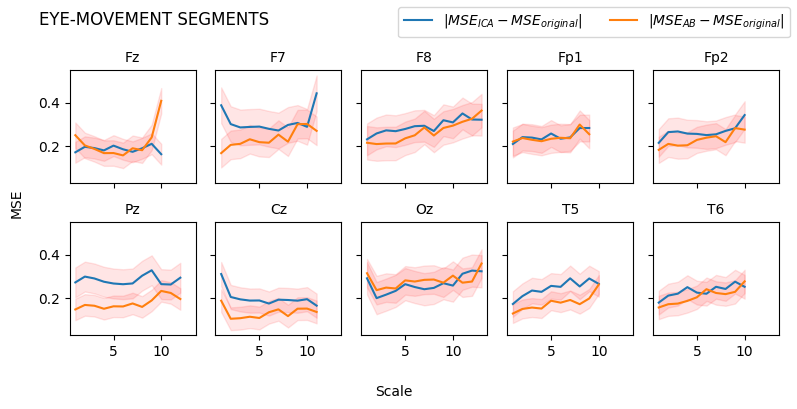

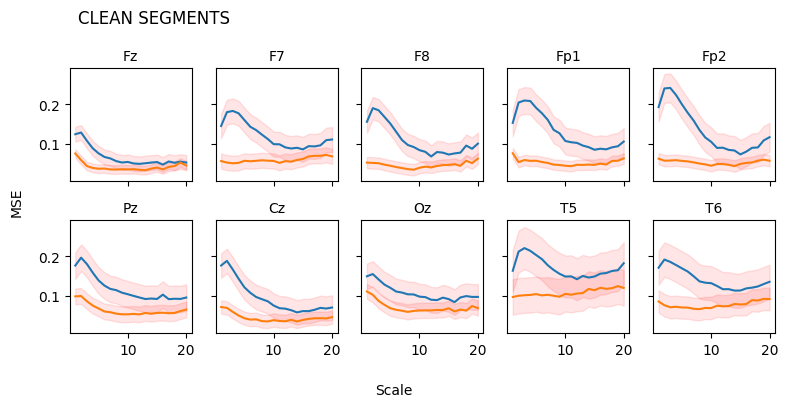

In [15]:
selected_channels = ['Fz','F7','F8','Fp1','Fp2','Pz','Cz', 'Oz','T5','T6']
fig, axes = plt.subplots(2,5,figsize=(8, 4),sharex=True, sharey=True)

for ax, channel in zip(axes.ravel(), selected_channels):
    mse = pd.read_csv(f'/Users/lina_01/Desktop/ab_ica/mse_{channel}.csv')
    pt_list = mse['pt'].unique()
    
    mse = mse[mse['entropy'].astype(str).str.contains('inf')==False]
    
    mse = mse[mse['entropy'].astype(str).str.contains('#NAME?')==False]
    
    mse_original = mse.loc[(mse['seg_type']=='saccade')&(mse['kind']=='original')]
    mse_ab = mse.loc[(mse['seg_type']=='saccade')&(mse['kind']=='AB')]
    mse_ica = mse.loc[(mse['seg_type']=='saccade')&(mse['kind']=='ICA')]

    mse_scales = []
    for pt in pt_list:
        scales_original = list(mse_original.loc[mse_original['pt']==pt]['Scale'])
        mse_scales.append(scales_original)
        scales_ab = list(mse_ab.loc[mse_ab['pt']==pt]['Scale'])
        mse_scales.append(scales_ab)
        scales_ica = list(mse_ica.loc[mse_ica['pt']==pt]['Scale'])
        mse_scales.append(scales_ica)

    scales_in_all = list(set.intersection(*map(set, mse_scales)))
    
    mse_original = mse_original.loc[mse_original['Scale']<=max(scales_in_all)]
    mse_original = mse_original.astype({'entropy':'float'})
    mse_ab = mse_ab.loc[mse_ab['Scale']<=max(scales_in_all)]
    mse_ab = mse_ab.astype({'entropy':'float'})
    mse_ica = mse_ica.loc[mse_ica['Scale']<=max(scales_in_all)]
    mse_ica = mse_ica.astype({'entropy':'float'})

    mse_original.reset_index(inplace=True)
    mse_ab.reset_index(inplace=True)
    mse_ica.reset_index(inplace=True)

    diff_ica = np.abs(mse_ica['entropy'] - mse_original['entropy'])
    mse_original['diff_ica'] = diff_ica
    diff_ab = np.abs(mse_ab['entropy'] - mse_original['entropy'])
    mse_original['diff_ab'] = diff_ab
    ci_ica = 1.96 * np.std(diff_ica)/np.sqrt(50)
    ci_ab = 1.96 * np.std(diff_ab)/np.sqrt(50)

    mse_original = mse_original.groupby(['Scale']).mean(['diff_ica','diff_ab']).reset_index()

    ax.plot(mse_original['Scale'], mse_original['diff_ica'], label='|$MSE_{ICA}-MSE_{original}$|')
    ax.fill_between(mse_original['Scale'], (mse_original['diff_ica']-ci_ica), (mse_original['diff_ica']+ci_ica), color='r',alpha=0.1)
    ax.plot(mse_original['Scale'], mse_original['diff_ab'], label='$|MSE_{AB}-MSE_{original}|$')
    ax.fill_between(mse_original['Scale'], (mse_original['diff_ab']-ci_ab), (mse_original['diff_ab']+ci_ab), color='r',alpha=0.1)

    ax.set_title(channel,fontsize=10)

fig.patch.set_facecolor('white')
fig.suptitle('EYE-MOVEMENT SEGMENTS',fontsize=12,x=0.2)
fig.supylabel('MSE',fontsize=10)
fig.supxlabel('Scale',fontsize=10)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=3,loc='outside right upper',fontsize=10)
fig.tight_layout()
plt.savefig('fig6a.png')

selected_channels = ['Fz','F7','F8','Fp1','Fp2','Pz','Cz', 'Oz','T5','T6']
fig, axes = plt.subplots(2,5,figsize=(8, 4),sharex=True, sharey=True)

for ax, channel in zip(axes.ravel(), selected_channels):
    mse = pd.read_csv(f'/Users/lina_01/Desktop/ab_ica/mse_{channel}.csv')
    pt_list = mse['pt'].unique()
    
    mse = mse[mse['entropy'].astype(str).str.contains('inf')==False]
    
    mse = mse[mse['entropy'].astype(str).str.contains('#NAME?')==False]
    
    mse_original = mse.loc[(mse['seg_type']=='clean')&(mse['kind']=='original')]
    mse_ab = mse.loc[(mse['seg_type']=='clean')&(mse['kind']=='AB')]
    mse_ica = mse.loc[(mse['seg_type']=='clean')&(mse['kind']=='ICA')]

    mse_scales = []
    for pt in pt_list:
        scales_original = list(mse_original.loc[mse_original['pt']==pt]['Scale'])
        mse_scales.append(scales_original)
        scales_ab = list(mse_ab.loc[mse_ab['pt']==pt]['Scale'])
        mse_scales.append(scales_ab)
        scales_ica = list(mse_ica.loc[mse_ica['pt']==pt]['Scale'])
        mse_scales.append(scales_ica)

    scales_in_all = list(set.intersection(*map(set, mse_scales)))
    
    mse_original = mse_original.loc[mse_original['Scale']<=max(scales_in_all)]
    mse_original = mse_original.astype({'entropy':'float'})
    mse_ab = mse_ab.loc[mse_ab['Scale']<=max(scales_in_all)]
    mse_ab = mse_ab.astype({'entropy':'float'})
    mse_ica = mse_ica.loc[mse_ica['Scale']<=max(scales_in_all)]
    mse_ica = mse_ica.astype({'entropy':'float'})

    mse_original.reset_index(inplace=True)
    mse_ab.reset_index(inplace=True)
    mse_ica.reset_index(inplace=True)

    diff_ica = np.abs(mse_ica['entropy'] - mse_original['entropy'])
    mse_original['diff_ica'] = diff_ica
    diff_ab = np.abs(mse_ab['entropy'] - mse_original['entropy'])
    mse_original['diff_ab'] = diff_ab
    ci_ica = 1.96 * np.std(diff_ica)/np.sqrt(50)
    ci_ab = 1.96 * np.std(diff_ab)/np.sqrt(50)

    mse_original = mse_original.groupby(['Scale']).mean(['diff_ica','diff_ab']).reset_index()

    ax.plot(mse_original['Scale'], mse_original['diff_ica'])
    ax.fill_between(mse_original['Scale'], (mse_original['diff_ica']-ci_ica), (mse_original['diff_ica']+ci_ica), color='r',alpha=0.1)
    ax.plot(mse_original['Scale'], mse_original['diff_ab'])
    ax.fill_between(mse_original['Scale'], (mse_original['diff_ab']-ci_ab), (mse_original['diff_ab']+ci_ab), color='r',alpha=0.1)

    ax.set_title(channel,fontsize=10)


fig.patch.set_facecolor('white')
fig.suptitle('CLEAN SEGMENTS',fontsize=12,x=0.2)
fig.supylabel('MSE',fontsize=10)
fig.supxlabel('Scale',fontsize=10)
fig.tight_layout()
plt.savefig('fig6b.png')

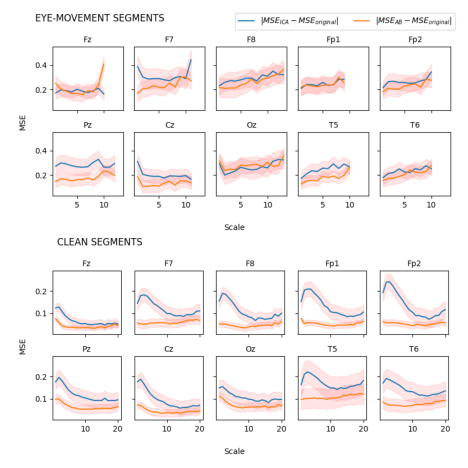

In [16]:
import matplotlib.image as mpimg
figures = ['6a','6b']
margin = 200
fig, axes = plt.subplots(2, 1, figsize=(6, 4.6))
for figure, ax in zip(figures, axes.ravel()):
    img = mpimg.imread(f"/Users/lina_01/Desktop/ab_ica/fig{figure}.png")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set(frame_on=False)
    
    ax.imshow(img)        
    ax.set_aspect(1)    
    
fig.tight_layout(rect=[-0.01, -0.02, 1.02, 1.02], w_pad=0.0, h_pad=0.0)
fig.savefig("fig6.png", dpi=300)

In [ ]:
#Statistical analysis

In [8]:
montage = mne.channels.make_standard_montage(kind='GSN-HydroCel-129')
info = mne.create_info(montage.ch_names, sfreq=500, ch_types='eeg')
raw = mne.io.RawArray(np.zeros([129,1]), info).set_montage(montage)

adj_matrix = mne.channels.find_ch_adjacency(raw.info, ch_type='eeg')[0]
adj_matrix = mne.stats.combine_adjacency(adj_matrix, 20)

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 129


## Statistical analysis

In [5]:
df_entropy_all = pd.read_csv('/Users/lina_01/Desktop/ab_ica/entropy_all_20_scales.csv')

In [6]:
df_entropy_all_scale_original = df_entropy_all.loc[(df_entropy_all['Scale']==1) & (df_entropy_all['kind']=='original') 
                                & (df_entropy_all['seg_type']=='clean')]

In [7]:
df_entropy_all_scale_original['entropy_float']=df_entropy_all_scale_original['entropy'].astype(float)

/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_943/766608201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy_all_scale_original['entropy_float']=df_entropy_all_scale_original['entropy'].astype(float)


In [8]:
df_entropy_all_scale_ica = df_entropy_all.loc[(df_entropy_all['Scale']==1) & (df_entropy_all['kind']=='ICA') & 
                           (df_entropy_all['seg_type']=='clean')]

In [9]:
df_entropy_all_scale_ica['entropy_float'] = df_entropy_all_scale_ica['entropy'].astype(float)

/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_943/3412111833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy_all_scale_ica['entropy_float'] = df_entropy_all_scale_ica['entropy'].astype(float)


In [ ]:
#description 

((array([-3.70080356, -3.46937235, -3.34201159, ...,  3.34201159,
          3.46937235,  3.70080356]),
  array([-0.85819991, -0.84299188, -0.81734307, ...,  0.78767666,
          0.88497371,  0.93026075])),
 (0.1989969330814463, -0.05104231995271319, 0.9874221975795077))

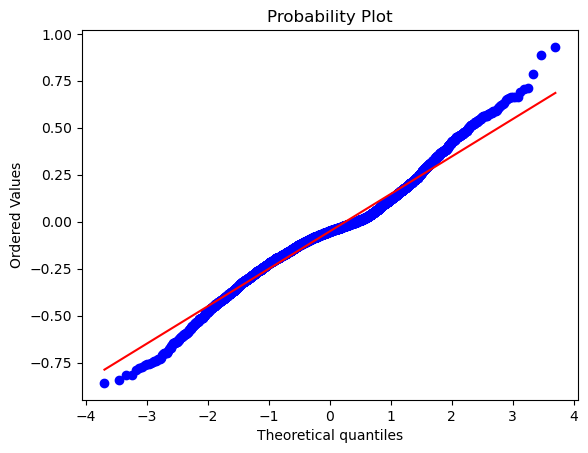

In [32]:
#qq plot to justify wilcoxon
import pylab
stats.probplot(np.array(df_entropy_all_scale_original['entropy_float'])-
               np.array(df_entropy_all_scale_ica['entropy_float']), plot=pylab)

### Setting parameters for the cluster-based permutation test

In [5]:
df_entropy_all = pd.read_csv('/Users/lina_01/Desktop/ab_ica/entropy_all_20_scales.csv')

In [6]:
montage = mne.channels.make_standard_montage(kind='GSN-HydroCel-129')
info = mne.create_info(montage.ch_names, sfreq=500, ch_types='eeg')
raw = mne.io.RawArray(np.zeros([129,1]), info).set_montage(montage)

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


In [7]:
adj_matrix = mne.channels.find_ch_adjacency(raw.info, ch_type='eeg')[0]
adj_matrix = mne.stats.combine_adjacency(adj_matrix, 20)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 129


In [8]:
df_entropy_all =  df_entropy_all[df_entropy_all['entropy'].astype(str).str.contains('inf')==False]
df_entropy_all =  df_entropy_all[df_entropy_all['entropy'].astype(str).str.contains('#NAME?')==False]

In [9]:
df_entropy_all['entropy_float'] = df_entropy_all['entropy'].astype(float)

In [10]:
df_entropy_all_clean = df_entropy_all.loc[df_entropy_all['seg_type']=='clean']

original_entropy = df_entropy_all_clean.loc[df_entropy_all_clean['kind']=='original']['entropy_float'].values
ab_entropy = df_entropy_all_clean.loc[df_entropy_all_clean['kind']=='AB']['entropy_float'].values
diff_AB = np.abs(np.subtract(original_entropy, ab_entropy))

df_entropy_all_clean_ab = df_entropy_all_clean.loc[df_entropy_all_clean['kind']=='AB']
df_entropy_all_clean_ab['diff_AB'] = diff_AB

original_entropy = df_entropy_all_clean.loc[df_entropy_all_clean['kind']=='original']['entropy_float'].values
ica_entropy = df_entropy_all_clean.loc[df_entropy_all_clean['kind']=='ICA']['entropy_float'].values
diff_ICA = np.abs(np.subtract(original_entropy, ica_entropy))

df_entropy_all_clean_ica = df_entropy_all_clean.loc[df_entropy_all_clean['kind']=='ICA']
df_entropy_all_clean_ica['diff_ICA'] = diff_ICA

/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_845/1449582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy_all_clean_ab['diff_AB'] = diff_AB
/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_845/1449582.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy_all_clean_ica['diff_ICA'] = diff_ICA


In [11]:
scales = list(df_entropy_all['Scale'].unique())

In [12]:
threshold = 434 #for alpha=0.05, n=50, as per https://real-statistics.com/statistics-tables/wilcoxon-signed-ranks-table/
X_clean_ica_original =[]
for scale in scales:
    df_entropy_all_clean_scale_ica = df_entropy_all_clean_ica.loc[df_entropy_all_clean_ica['Scale']==scale]
    df_entropy_all_clean_scale_ica = df_entropy_all_clean_scale_ica[['diff_ICA','pt','channel']]
    df_entropy_all_clean_scale_ica = np.array(df_entropy_all_clean_scale_ica.pivot_table(index='pt',columns='channel',
                                                                                         values='diff_ICA'))
    df_entropy_all_clean_scale_ab = df_entropy_all_clean_ab.loc[df_entropy_all_clean_ab['Scale']==scale]
    df_entropy_all_clean_scale_ab = df_entropy_all_clean_scale_ab[['diff_AB','pt','channel']]
    df_entropy_all_clean_scale_ab = np.array(df_entropy_all_clean_scale_ab.pivot_table(index='pt',columns='channel',
                                                                                         values='diff_AB'))
    X_clean_ica_original.append([df_entropy_all_clean_scale_ab, df_entropy_all_clean_scale_ica])
    
X_clean_ica_original = np.array(X_clean_ica_original).transpose([1, 2, 3, 0])

def wilcox_stat_fun(x, y, axis=0):
    return 1/stats.wilcoxon(x,y,axis=axis)[0]
    
w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_clean_ica_original, threshold=1/threshold, n_permutations=1000,
                                                                 stat_fun = wilcox_stat_fun, adjacency=adj_matrix)

stat_fun(H1): min=0.001580 max=0.021739
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [14]:
clusters_pv

array([0.001])

In [46]:
dfs = []
for i in list(range(len(clusters))):
    clusters_array = np.array(clusters[i])
    df = pd.DataFrame(clusters_array).T
    df['Cluster'] = i
    df = df.rename(columns= {0:'Channel',1:'Scale'}) 
    dfs.append(df)

In [47]:
heatmap_df = pd.concat(dfs)
heatmap_df = pd.pivot_table(heatmap_df, index='Scale', columns='Channel', values='Cluster')

<Axes: xlabel='Channel', ylabel='Scale'>

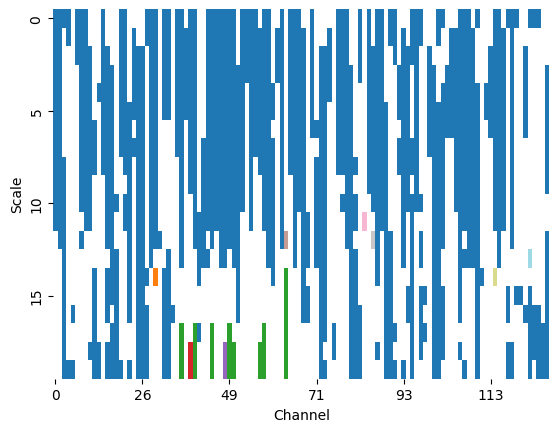

In [48]:
sns.heatmap(heatmap_df,xticklabels=20, yticklabels=5, cmap='tab20', cbar=False)

In [18]:
df_entropy_all_saccade = df_entropy_all.loc[df_entropy_all['seg_type']=='saccade']

original_entropy = df_entropy_all_saccade.loc[df_entropy_all_saccade['kind']=='original']['entropy_float'].values
original_entropy = original_entropy[:126886]
ab_entropy = df_entropy_all_saccade.loc[df_entropy_all_saccade['kind']=='AB']['entropy_float'].values
diff_AB = np.abs(np.subtract(original_entropy, ab_entropy))

df_entropy_all_saccade_ab = df_entropy_all_saccade.loc[df_entropy_all_saccade['kind']=='AB']
df_entropy_all_saccade_ab['diff_AB'] = diff_AB

original_entropy = df_entropy_all_saccade.loc[df_entropy_all_saccade['kind']=='original']['entropy_float'].values
original_entropy = original_entropy[:126802]
ica_entropy = df_entropy_all_saccade.loc[df_entropy_all_saccade['kind']=='ICA']['entropy_float'].values
diff_ICA = np.abs(np.subtract(original_entropy, ica_entropy))

df_entropy_all_saccade_ica = df_entropy_all_saccade.loc[df_entropy_all_saccade['kind']=='ICA']
df_entropy_all_saccade_ica['diff_ICA'] = diff_ICA

/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_845/782772442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy_all_saccade_ab['diff_AB'] = diff_AB
/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_845/782772442.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entropy_all_saccade_ica['diff_ICA'] = diff_ICA


In [19]:
threshold = 434 #for alpha=0.05, n=50, as per https://real-statistics.com/statistics-tables/wilcoxon-signed-ranks-table/
X_saccade_ica_original =[]
for scale in scales:
    df_entropy_all_saccade_scale_ica = df_entropy_all_saccade_ica.loc[df_entropy_all_saccade_ica['Scale']==scale]
    df_entropy_all_saccade_scale_ica = df_entropy_all_saccade_scale_ica[['diff_ICA','pt','channel']]
    df_entropy_all_saccade_scale_ica = np.array(df_entropy_all_saccade_scale_ica.pivot_table(index='pt',columns='channel',
                                                                                         values='diff_ICA'))
    df_entropy_all_saccade_scale_ab = df_entropy_all_saccade_ab.loc[df_entropy_all_saccade_ab['Scale']==scale]
    df_entropy_all_saccade_scale_ab = df_entropy_all_saccade_scale_ab[['diff_AB','pt','channel']]
    df_entropy_all_saccade_scale_ab = np.array(df_entropy_all_saccade_scale_ab.pivot_table(index='pt',columns='channel',
                                                                                         values='diff_AB'))
    X_saccade_ica_original.append([df_entropy_all_saccade_scale_ab, df_entropy_all_saccade_scale_ica])
    
X_saccade_ica_original = np.array(X_saccade_ica_original).transpose([1, 2, 3, 0])

def wilcox_stat_fun(x, y, axis=0):
    return 1/stats.wilcoxon(x,y,axis=axis)[0]
    
w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_saccade_ica_original, threshold=1/threshold, n_permutations=1000,
                                                                 stat_fun = wilcox_stat_fun, adjacency=adj_matrix)

stat_fun(H1): min=nan max=nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Running initial clustering …
Found 59 clusters


/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_845/167552699.py:19: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_saccade_ica_original, threshold=1/threshold, n_permutations=1000,


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [27]:
set(list(clusters[1][1]))

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [20]:
clusters_pv

array([0.939, 0.001, 1.   , 1.   , 1.   , 0.996, 0.996, 0.94 , 1.   ,
       1.   , 1.   , 0.047, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       0.996, 1.   , 1.   , 1.   , 0.999, 0.999, 1.   , 0.834, 1.   ,
       1.   , 1.   , 1.   , 0.995, 0.956, 0.968, 1.   , 1.   , 1.   ,
       0.467, 0.933, 0.996, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.999, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.047,
       1.   , 1.   , 1.   , 1.   , 1.   ])

In [93]:
dfs = []
for i in list(range(len(clusters))):
    clusters_array = np.array(clusters[i])
    df = pd.DataFrame(clusters_array).T
    df['Cluster'] = i
    df = df.rename(columns= {0:'Channel',1:'Scale'}) 
    dfs.append(df)

In [94]:
heatmap_df = pd.concat(dfs)
heatmap_df = pd.pivot_table(heatmap_df, index='Scale', columns='Channel', values='Cluster')

<Axes: xlabel='Channel', ylabel='Scale'>

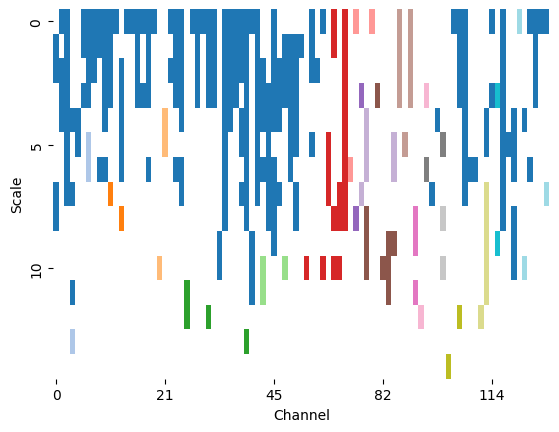

In [95]:
sns.heatmap(heatmap_df,xticklabels=20, yticklabels=5, cmap='tab20', cbar=False)

##### Original vs AB-processed

In [55]:
threshold = 434 #for alpha=0.05, n=50, as per https://real-statistics.com/statistics-tables/wilcoxon-signed-ranks-table/
w_s = []
p_s = []
X_clean_ab_original = []
for scale in scales:
    df_entropy_all_clean_scale_ab = df_entropy_all_clean.loc[(df_entropy_all_clean['kind']=='AB')
                                                             & (df_entropy_all_clean['Scale']==scale)]
    df_entropy_all_clean_scale_ab = df_entropy_all_clean_scale_ab[['entropy','pt','channel']]
    df_entropy_all_clean_scale_ab['entropy_float'] = df_entropy_all_clean_scale_ab['entropy'].astype(float)
    df_entropy_all_clean_scale_ab = np.array(df_entropy_all_clean_scale_ab.pivot_table(index='pt',columns='channel',
                                                                                         values='entropy_float'))
    df_entropy_all_clean_scale_original = df_entropy_all_clean.loc[(df_entropy_all_clean['kind']=='original')
                                                             & (df_entropy_all_clean['Scale']==scale)]
    df_entropy_all_clean_scale_original = df_entropy_all_clean_scale_original[['entropy','pt','channel']]
    df_entropy_all_clean_scale_original['entropy_float'] = df_entropy_all_clean_scale_original['entropy'].astype(float)
    df_entropy_all_clean_scale_original = np.array(df_entropy_all_clean_scale_original.pivot_table(index='pt',
                                                                                        columns='channel',values='entropy_float'))
    X_clean_ab_original.append([df_entropy_all_clean_scale_original, df_entropy_all_clean_scale_ab])

X_clean_ab_original = np.array(X_clean_ab_original).transpose([1, 2, 3, 0])
    
def wilcox_stat_fun(x, y, axis=0):
    return 1/stats.wilcoxon(x,y,axis=axis)[0]

w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_clean_ab_original, threshold=1/threshold, n_permutations=1000,
                                                                 stat_fun = wilcox_stat_fun, adjacency=adj_matrix)

stat_fun(H1): min=0.001570 max=inf


/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_93457/906168693.py:23: RuntimeWarning: divide by zero encountered in divide
  return 1/stats.wilcoxon(x,y,axis=axis)[0]


Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

/Applications/MNE-Python/1.5.1_0/.mne-python/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [56]:
clusters_pv

array([0.001])

In [57]:
dfs = []
for i in list(range(len(clusters))):
    clusters_array = np.array(clusters[i])
    df = pd.DataFrame(clusters_array).T
    df['Cluster'] = i
    df = df.rename(columns= {0:'Channel',1:'Scale'}) 
    dfs.append(df)

<Axes: xlabel='Channel', ylabel='Scale'>

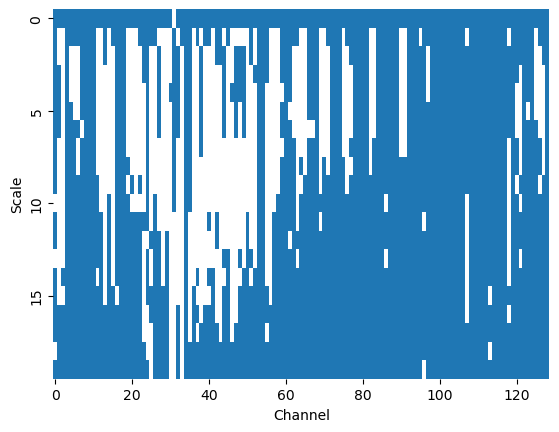

In [59]:
heatmap_df = pd.concat(dfs)
heatmap_df = pd.pivot_table(heatmap_df, index='Scale', columns='Channel', values='Cluster')
sns.heatmap(heatmap_df, xticklabels=20, yticklabels=5, cmap='tab20',cbar=False)

In [13]:
df_entropy_all_saccade = df_entropy_all.loc[df_entropy_all['seg_type']=='saccade']
df_entropy_all_saccade = df_entropy_all_saccade[df_entropy_all_saccade['entropy'].astype(str).str.contains('inf')==False]
df_entropy_all_saccade = df_entropy_all_saccade[df_entropy_all_saccade['entropy'].astype(str).str.contains('#NAME?')==False]

##### Original vs ICA-processed eye movement segments

In [29]:
threshold = 434 #for alpha=0.05, n=50, as per https://real-statistics.com/statistics-tables/wilcoxon-signed-ranks-table/
w_s = []
p_s = []
X_saccade_ica_original = []
for scale in scales:
    df_entropy_all_saccade_scale_ica = df_entropy_all_saccade.loc[(df_entropy_all_saccade['kind']=='ICA')
                                                             & (df_entropy_all_saccade['Scale']==scale)]
    df_entropy_all_saccade_scale_ica = df_entropy_all_saccade_scale_ica[['entropy','pt','channel']]
    df_entropy_all_saccade_scale_ica['entropy_float'] = df_entropy_all_saccade_scale_ica['entropy'].astype(float)
    df_entropy_all_saccade_scale_ica = np.array(df_entropy_all_saccade_scale_ica.pivot_table(index='pt',columns='channel',
                                                                                         values='entropy_float'))
    df_entropy_all_saccade_scale_original = df_entropy_all_saccade.loc[(df_entropy_all_saccade['kind']=='original')
                                                             & (df_entropy_all_saccade['Scale']==scale)]
    df_entropy_all_saccade_scale_original = df_entropy_all_saccade_scale_original[['entropy','pt','channel']]
    df_entropy_all_saccade_scale_original['entropy_float'] = df_entropy_all_saccade_scale_original['entropy'].astype(float)
    df_entropy_all_saccade_scale_original = np.array(df_entropy_all_saccade_scale_original.pivot_table(index='pt',
                                                                                        columns='channel',values='entropy_float'))
    X_saccade_ica_original.append([df_entropy_all_saccade_scale_original, df_entropy_all_saccade_scale_ica])
    
X_saccade_ica_original = np.array(X_saccade_ica_original).transpose([1, 2, 3, 0])
    
def wilcox_stat_fun(x, y, axis=0):
    return 1/stats.wilcoxon(x,y,axis=axis)[0]

w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_saccade_ica_original, threshold=1/threshold, n_permutations=1000,
                                                                     stat_fun = wilcox_stat_fun, tail=1, adjacency=adj_matrix)

/Applications/MNE-Python/1.5.1_0/.mne-python/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 18 clusters


/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_2631/1353114460.py:25: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_saccade_ica_original, threshold=1/threshold, n_permutations=1000,


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

<Axes: xlabel='Channel', ylabel='Scale'>

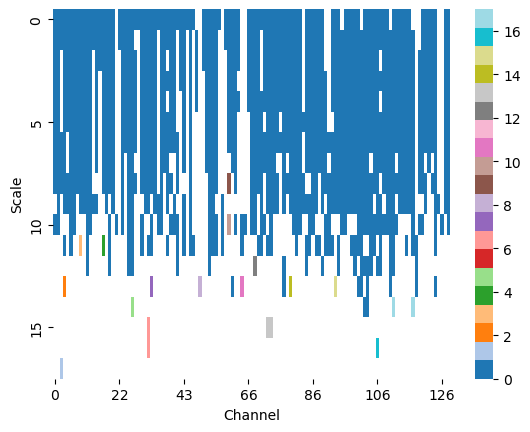

In [50]:
dfs = []
for i in list(range(len(clusters))):
    clusters_array = np.array(clusters[i])
    df = pd.DataFrame(clusters_array).T
    df['Cluster'] = i
    df = df.rename(columns= {0:'Channel',1:'Scale'}) 
    dfs.append(df)

heatmap_df = pd.concat(dfs)
heatmap_df = pd.pivot_table(heatmap_df, index='Scale', columns='Channel', values='Cluster')
sns.heatmap(heatmap_df, xticklabels=20, yticklabels=5, cmap='tab20')

##### Original vs AB-processed

In [18]:
threshold = 434
w_s = []
p_s = []
X_saccade_ab_original = []
for scale in scales:
    df_entropy_all_saccade_scale_ab = df_entropy_all_saccade.loc[(df_entropy_all_saccade['kind']=='AB')
                                                             & (df_entropy_all_saccade['Scale']==scale)]
    df_entropy_all_saccade_scale_ab = df_entropy_all_saccade_scale_ab[['entropy','pt','channel']]
    df_entropy_all_saccade_scale_ab['entropy_float'] = df_entropy_all_saccade_scale_ab['entropy'].astype(float)
    df_entropy_all_saccade_scale_ab = np.array(df_entropy_all_saccade_scale_ab.pivot_table(index='pt',columns='channel',
                                                                                         values='entropy_float'))
    df_entropy_all_saccade_scale_original = df_entropy_all_saccade.loc[(df_entropy_all_saccade['kind']=='original')
                                                             & (df_entropy_all_saccade['Scale']==scale)]
    df_entropy_all_saccade_scale_original = df_entropy_all_saccade_scale_original[['entropy','pt','channel']]
    df_entropy_all_saccade_scale_original['entropy_float'] = df_entropy_all_saccade_scale_original['entropy'].astype(float)
    df_entropy_all_saccade_scale_original = np.array(df_entropy_all_saccade_scale_original.pivot_table(index='pt',
                                                                                        columns='channel',values='entropy_float'))
    
    X_saccade_ab_original.append([df_entropy_all_saccade_scale_original, df_entropy_all_saccade_scale_ab])

X_saccade_ab_original = np.array(X_saccade_ab_original).transpose([1, 2, 3, 0])
   
def wilcox_stat_fun(x, y, axis=0):
    return 1/stats.wilcoxon(x,y,axis=axis)[0]

w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_saccade_ab_original, threshold=1/threshold, n_permutations=1000,
                                                                 stat_fun = wilcox_stat_fun, adjacency=adj_matrix)

/Applications/MNE-Python/1.5.1_0/.mne-python/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 21 clusters


/var/folders/cl/8cj5mvt51nbchvsgng871t400000gn/T/ipykernel_2631/1944652449.py:26: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  w, clusters,clusters_pv, h0 = mne.stats.permutation_cluster_test(X_saccade_ab_original, threshold=1/threshold, n_permutations=1000,


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

/Applications/MNE-Python/1.5.1_0/.mne-python/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [26]:
import sys

In [27]:
np.set_printoptions(threshold=sys.maxsize)

In [52]:
dfs = []
for i in list(range(len(clusters))):
    clusters_array = np.array(clusters[i])
    df = pd.DataFrame(clusters_array).T
    df['Cluster'] = i
    df = df.rename(columns= {0:'Channel',1:'Scale'}) 
    dfs.append(df)

<Axes: xlabel='Channel', ylabel='Scale'>

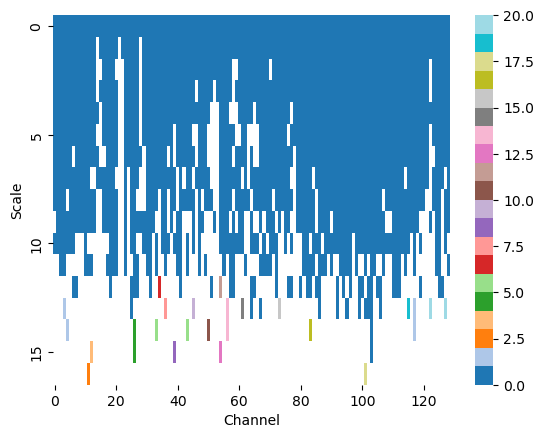

In [54]:
heatmap_df = pd.concat(dfs)
heatmap_df = pd.pivot_table(heatmap_df, index='Scale', columns='Channel', values='Cluster')
sns.heatmap(heatmap_df, xticklabels=20, yticklabels=5, cmap='tab20')

### Code to create the dataframe 'df_entropy_20_scales.csv'

In [ ]:
montage = mne.channels.make_standard_montage(kind='GSN-HydroCel-129')
info = mne.create_info(montage.ch_names, sfreq=500, ch_types='eeg')
raw = mne.io.RawArray(np.zeros([129,1]), info).set_montage(montage)

In [8]:
ab_ica_pt_selection = pd.read_excel('C:/Users/diksh/Downloads/AB_ICA_pt_table_trial.xlsx')

In [ ]:
start_time = time.time()
entropy_dfs = []
kinds = ['original', 'AB', 'ICA']
seg_types = ['clean', 'saccade']
path = 'C:/Users/diksh/Downloads'
pts = list(ab_ica_pt_selection['pt'])
for kind, seg_type in product(kinds, seg_types):
    for pt in pts:
        channels = raw.ch_names[0:5]
        annot_file = f'/Users/diksh/Downloads/manual_annot_AB_ICA_{pt}.csv'
        annotations = mne.read_annotations(annot_file)
        times = {}
        for annot in annotations:
            times['onset'] = np.array([annot['onset'] for annot in annotations if annot['description']==seg_type])
            times['duration'] = np.array([annot['duration'] for annot in annotations if annot['description']==seg_type])
            times['offset'] = times['onset'] + times['duration']
            
        sampens = []
        for chan in channels:
            crops = []
            for tmin, tmax in zip(times['onset'],times['offset']):
                if kind=='original':
                    raw_file = mne.io.read_raw_fif(f'{path}/{pt}_rest_raw_processed.fif')           

                elif kind=='AB':
                    raw_file_original = mne.io.read_raw_fif(f'{path}/{pt}_rest_raw_processed.fif')
                    AB_mat_outdata = read_mat(f'{path}/{pt}_AB_outdata.mat')
                    AB_mat_outdata = AB_mat_outdata['datatosave_out']['OutData']
                    raw_file = mne.io.RawArray(AB_mat_outdata, raw_file_original.info)

                else:
                    raw_file = mne.io.read_raw_fif(f'{path}/{pt}_rest_raw_ica.fif')
                
                crop = raw_file.crop(tmin=tmin, tmax=tmax)
                crops.append(crop)

            crop_file = mne.concatenate_raws(crops) 
            crop_file_data = crop_file.get_data(picks=chan)
            m = 2
            entropy = nk.entropy_multiscale(crop_file_data.squeeze(), scale=20, dimension=2)
            entropy = pd.DataFrame({'Scale':entropy[1]['Scale'], 'Value':entropy[1]['Values']}, columns=['Scale','Value'])
            entropy['pt'] = pt
            entropy['kind'] = kind
            entropy['channel'] = chan
            entropy['seg_type'] = seg_type
            entropy_dfs.append(entropy)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
entropy_dfs = pd.concat(entropy_dfs)

In [39]:
entropy_dfs.to_csv('C:/Users/dsrish/Desktop/entropy_dfs_Cz.csv')